In [12]:
import numpy as np
from scipy import integrate

Define Bessel function

In [13]:
def J(m,x):
    integrand = lambda theta, m,x: 1/(np.pi)*np.cos(m*theta - x*np.sin(theta))
    result,err = integrate.quad(integrand,0, np.pi,args=(m,x))
    return result

Plot the function for a few m

Populating the interactive namespace from numpy and matplotlib


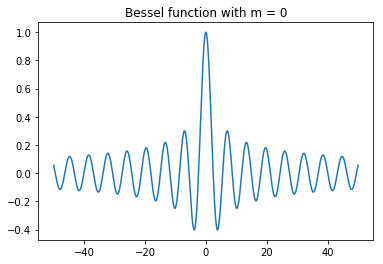

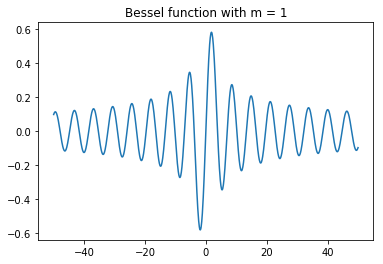

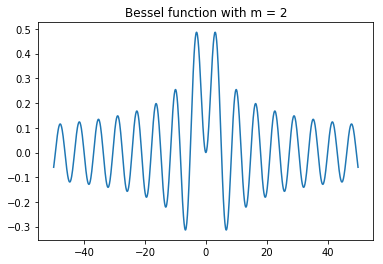

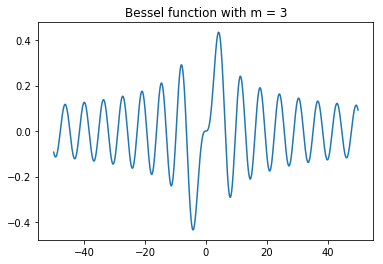

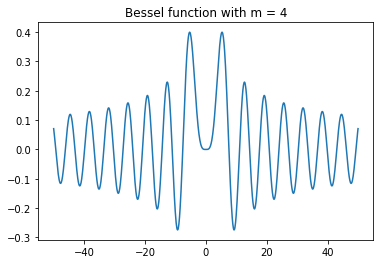

In [14]:
%pylab inline
import matplotlib.pyplot as plt
x = np.linspace(-50,50,1000)
y = np.zeros(np.size(x))
for m in range(5):
    for i in range(np.size(x)):
        y[i] = J(m, x[i])
    plt.figure(m)
    plt.plot(x,y)
    plt.title("Bessel function with m = {}".format(m))

Define intensity function at a distance q

In [16]:
def I(q,a,lam,R,I_0):
    #lam stands for lambda
    x = 2*np.pi*a*q/(lam*R)
    return I_0*(2*J(1,x)/x)**2

Define a function that generate distance to origin

In [17]:
def distance(x,y):
    return np.sqrt(x**2 + y**2)

Create a functiont that outputs the image

In [18]:
def image(a,lam,R,I_0):
    # assume a, lam, R are all given in units of meters
    # Create the x and y arrays for the x and y axis
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    # create a 2 dimensional array encoding the 2 dimensional graph
    xv, yv = np.meshgrid(x,y)
    # since q is the distance to the center (the optical axis)
    q = distance(xv,yv)
    # initialize final data
    data = np.zeros((100,100))
    for row_num in range(100):
        for item_num in range(100):
            # for each "pixel" in the final graph, set the brightness using the intensity function
            data[row_num][item_num] = I(q[row_num][item_num],a,lam,R,I_0)
    #display the data in gray scale, extent adjusts the scale to the correct -1 to 1
    plt.imshow(data, cmap = 'gray', extent = [-1,1,-1,1])
    plt.xlabel('x (meter)')
    plt.ylabel('y (meter)')
    plt.title("Image Through Telescope")
    plt.colorbar()

Try an example of this image by setting radius of telescope to 1 meter, wavelength to 1 meter, distance from lens to focal lens to 1 meter, and central intensity to be 1 unit

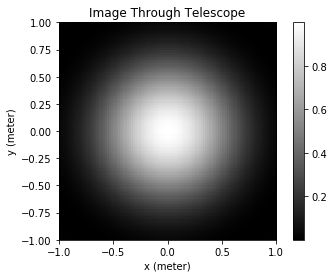

In [20]:
image(0.5,1,1,1)